In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]
X = df.drop("koi_disposition", axis=1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 40) (6991,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.787
k: 3, Train/Test Score: 0.895/0.805
k: 5, Train/Test Score: 0.871/0.811
k: 7, Train/Test Score: 0.862/0.818
k: 9, Train/Test Score: 0.858/0.820
k: 11, Train/Test Score: 0.848/0.830
k: 13, Train/Test Score: 0.848/0.830
k: 15, Train/Test Score: 0.842/0.830
k: 17, Train/Test Score: 0.839/0.830
k: 19, Train/Test Score: 0.836/0.831
k: 21, Train/Test Score: 0.835/0.832
k: 23, Train/Test Score: 0.834/0.831
k: 25, Train/Test Score: 0.829/0.827
k: 27, Train/Test Score: 0.829/0.830
k: 29, Train/Test Score: 0.829/0.831
k: 31, Train/Test Score: 0.828/0.826
k: 33, Train/Test Score: 0.828/0.831
k: 35, Train/Test Score: 0.827/0.832
k: 37, Train/Test Score: 0.826/0.832
k: 39, Train/Test Score: 0.824/0.830
k: 41, Train/Test Score: 0.824/0.834
k: 43, Train/Test Score: 0.823/0.835
k: 45, Train/Test Score: 0.823/0.835
k: 47, Train/Test Score: 0.825/0.836
k: 49, Train/Test Score: 0.824/0.835


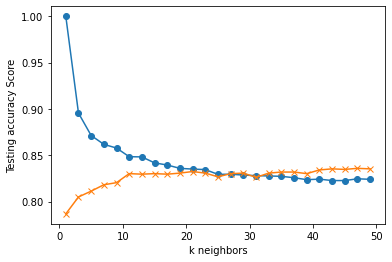

In [9]:
#we use K Nearest Neighbour for this
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)
print(prediction)
print(f"k=21 Training Data Score: {knn.score(X_train_scaled, y_train):.3f}")
print(f"k=21 Testing Data Score: {knn.score(X_test_scaled, y_test):.3f}")

[1 2 2 ... 2 2 1]
k=21 Training Data Score: 0.835
k=21 Testing Data Score: 0.832


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, 
                            target_names = ["Confirmed", "Candidate", "False Positive"]))

                precision    recall  f1-score   support

     Confirmed       0.72      0.48      0.58       404
     Candidate       0.63      0.81      0.71       435
False Positive       0.99      1.00      0.99       909

      accuracy                           0.83      1748
     macro avg       0.78      0.76      0.76      1748
  weighted avg       0.84      0.83      0.83      1748



# Save the Model

In [14]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']